In [4]:
# standard imports
import numpy as np
import pandas as pd

# 4. Evaluating a model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built in `score()` method
2. The `scoring` parameter
3. Problem specific metric functions

Read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with `score` method

### 4.1.1 Evaluating a classification problem

In [5]:
heart_df = pd.read_csv("scikit_learn_data/heart-disease.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_df.drop('target', axis=1)
y = heart_df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=250, random_state=5, n_jobs=-1)

model.fit(X_train, y_train)
model.score(X_test, y_test) # we have seen this already

0.819672131147541

### 4.1.2 Evaluating a regression problem 

In [8]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [9]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

In [10]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
print(housing['target_names'], housing['feature_names'])

['MedHouseVal'] ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [12]:
housing_df['MedHouseVal'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
# fitting it into our model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import time

np.random.seed(seed=5)

X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

start_time = time.time()
model = RandomForestRegressor(n_estimators=250, n_jobs=-1, random_state=5)
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
end_time = time.time()

print(f"Model score = {model_score}")
print(f"Model took {end_time-start_time} seconds to execute and score")

Model score = 0.8214989261303036
Model took 6.1478753089904785 seconds to execute and score


In [14]:
# default score() evaluation metric is r_squared for regression algorithms

## 4.2 Evaluating a model using the `scoring` parameter

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

np.random.seed(seed=5)

X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=250, n_jobs=-1, random_state=5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(cross_val_score(model, X, y))

0.8214989261303037
[0.51493601 0.70372483 0.74393447 0.62015716 0.68260214]


In [16]:
np.random.seed(seed=42)

# Single training and test split score
model_single_score = model.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score (cv=5 by default)
model_cross_val_score = cross_val_score(model, X, y, n_jobs=-1)

# compare karo
print(model_single_score, model_cross_val_score)

0.8214989261303036 [0.51493601 0.70372483 0.74393447 0.62015716 0.68260214]


In [17]:
# compare karo
print(model_single_score, np.mean(model_cross_val_score))

0.8214989261303036 0.6530709217106347


In [18]:
# Scoring parameter set to None by default
# cross_val_score(model, X, y, scoring=None)

# scoring=None by default
# default scoring technique for regression is R^2,
# default scoring technique for classification is score()

## 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [19]:
np.random.seed(seed=5)

X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

model = RandomForestRegressor(n_estimators=250, n_jobs=-1, random_state=5)
cross_val_sc = cross_val_score(model,X,y,cv=5)

In [20]:
np.mean(cross_val_sc)

np.float64(0.6530709217106347)

**Area under the Receiving Operating Characteristic curve**
* Area Under Curve (AUC)
* ROC Curve

ROC curves are a comparison of true positive rate (tpr) versus a model's false positive curve.

True positive = model predicts 1 when truth is 1    
False positive = model predicts 1 when truth is 0    
True negative = model predicts 0 when truth is 0    
False negative = model predicts 0 when truth is 1    

In [21]:
df = pd.read_csv('heart-disease.csv')

X = df.drop('target', axis=1)
y = df['target']

In [22]:
# create X_test, X_train, y_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
from sklearn.metrics import roc_curve
y_train = y_train.astype(int)
y_test = y_test.astype(int)

model = RandomForestClassifier(n_estimators=250, n_jobs=5, random_state=42)

# fit the data onto the classifier
model.fit(X_train, y_train)

# make predictions with the probabilities
y_probs = model.predict_proba(X_test)

In [24]:
y_probs[:10], len(y_probs)

(array([[0.228, 0.772],
        [0.9  , 0.1  ],
        [0.964, 0.036],
        [0.884, 0.116],
        [0.42 , 0.58 ],
        [0.868, 0.132],
        [0.34 , 0.66 ],
        [0.872, 0.128],
        [0.032, 0.968],
        [0.052, 0.948]]),
 61)

In [25]:
y_probs_positive = y_probs[:, 1]
print(y_probs_positive)

[0.772 0.1   0.036 0.116 0.58  0.132 0.66  0.128 0.968 0.948 0.844 0.076
 0.844 0.94  0.72  0.256 0.384 0.484 0.836 0.072 0.028 0.156 0.92  0.128
 0.308 0.944 0.62  0.932 0.856 0.032 0.88  0.928 0.52  0.68  0.16  0.28
 0.94  0.944 0.192 0.612 0.64  0.28  0.704 0.1   0.34  0.132 0.004 0.188
 0.192 0.056 0.088 0.664 0.744 0.8   1.    0.62  0.716 0.508 0.608 0.852
 0.328]


In [26]:
# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03333333, 0.03333333, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.1       , 0.1       ,
       0.26666667, 0.26666667, 0.3       , 0.33333333, 0.4       ,
       0.5       , 0.63333333, 0.66666667, 0.73333333, 1.        ])

### ROC curve plotting function

In [27]:
import matplotlib.pyplot as plt

In [28]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr)
    :param fpr: False positive rate
    :param tpr: True positive rate
    """
    
    # plot roc curve
    plt.plot(fpr, tpr,
             color='orange', 
             label='ROC'
             )
    
    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1],
             color='darkblue',
             linestyle='--',
             label='Guessing')
    
    # customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend()
    plt.show()

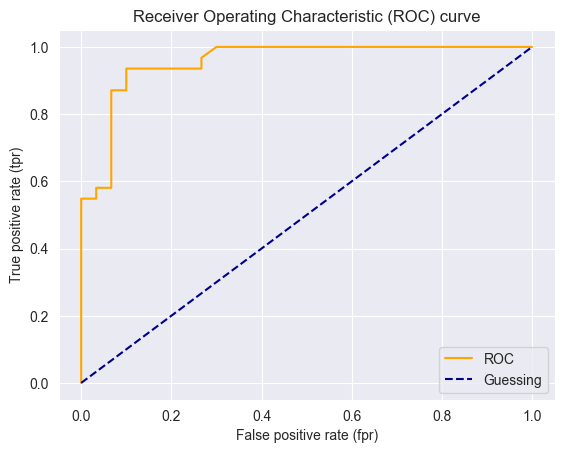

In [29]:
plot_roc_curve(fpr, tpr)

In [30]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

np.float64(0.9553763440860216)

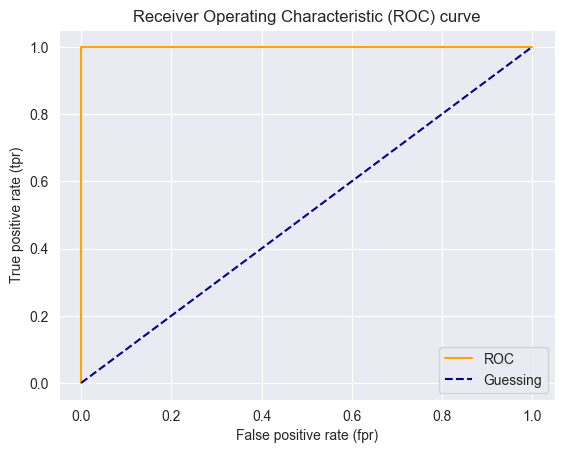

1.0


In [31]:
# Plotting a perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)
print(roc_auc_score(y_test, y_test))

## Confusion Matrix

A confusion matrix is a quick way to compare the labels that a model predicts and the actual labels that it was supposed to predict.    
In essence, it gives an idea of where the model is getting confused

In [32]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[26,  4],
       [ 2, 29]])

In [33]:
# visualize confusion matrix using pd.crostab()
pd.crosstab(y_test, y_preds,
            rownames=['Actual labels'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual labels,,
0,26,4
1,2,29


<Axes: >

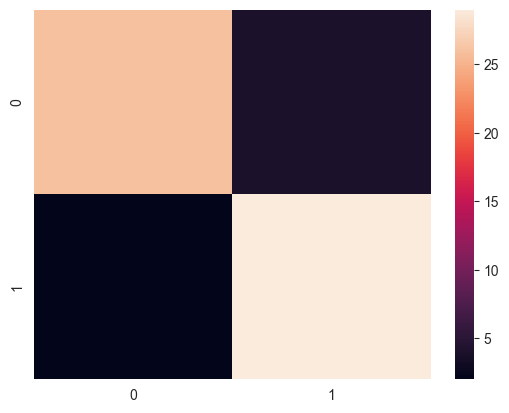

In [34]:
# use a heatmap to visualize it better
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat)

In [35]:
import sklearn
sklearn.__version__

'1.6.1'

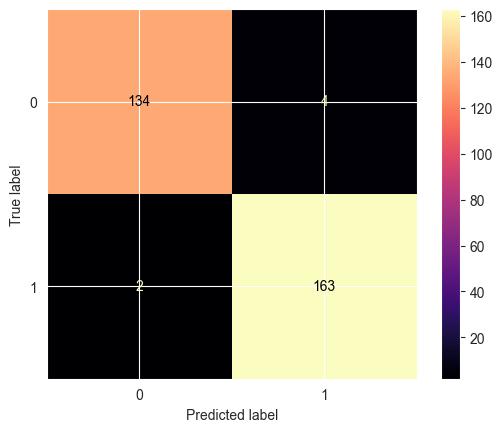

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y, cmap= "magma")

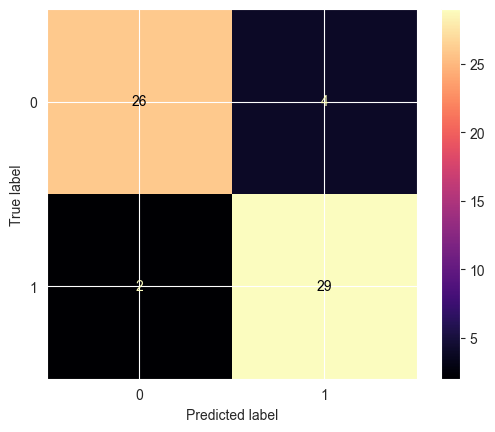

In [38]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds, cmap= "magma")

## Classification Report

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_preds)) 

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.88      0.94      0.91        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [42]:
# Where precision and recall become variable

disease_true = np.zeros(10000)
disease_true[0] = 1                     # only one positive case

disease_preds = np.zeros(10000)         # say model predicts every class as 0

pd.DataFrame(classification_report(y_true=disease_true, y_pred=disease_preds, output_dict=True, zero_division=np.nan))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,NaN,0.9999,0.999900,0.99990
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
* **Accuracy** is a goof measure to start with, if all the classes are balanced (same amount of sample)
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of prevision and recall.


# Regression model evaluation metrics

Model evaluation metrics for regression:
* R squared
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)

Find more: https://scikit-learn.org/1.4/modules/model_evaluation.html

In [42]:
# next notebook